In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians

In [15]:
# Import the data 
df = pd.read_csv("nyc-taxi-trip-duration/train.csv")

In [16]:
display(df.shape)
df.head()


(1458644, 11)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [17]:
def get_distance_between_points(lat1,lon1,lat2,lon2):
    '''
    This function is used to get the distance between lat1, lon1 and lat2, lon2
    '''
    # approximate radius of earth in km
    R = 6378.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

The coordinates of WALL STREET are 40.70729◦N, 74.01095◦W. 

In [18]:
df['dist_pickup_to_wall_street'] = np.vectorize(get_distance_between_points)(40.70729,-74.01095,df['pickup_latitude'], df['pickup_longitude'])



In order to extract the most relevant information from the
dataset for our purpose, we create a filtered dataset, in
which either the pick-up or drop-off location lies within
500 m from Wall Street (indicated by the red oval in Fig.
3(b)). In addition, we filter trips with unrealistically long
durations (>20 000 s).

In [52]:
print("Number of rows taht satisfied the filter above : ",df[( df['dist_pickup_to_wall_street'] <= 0.5)& (df['trip_duration'] < 20000)].shape)



Number of rows taht satisfied the filter above :  (20535, 12)


In [53]:
df_wall = df[( df['dist_pickup_to_wall_street'] <= 0.5)& (df['trip_duration'] < 20000)]

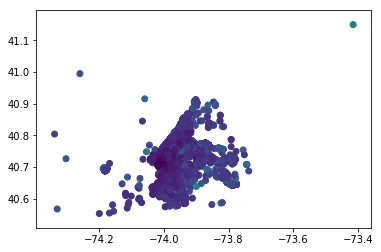

In [74]:
plt.scatter(df_wall['dropoff_longitude'], df_wall['dropoff_latitude'], c=df_wall['trip_duration'])

(array([8.580e+02, 2.254e+03, 3.487e+03, 3.816e+03, 3.180e+03, 2.268e+03,
        1.556e+03, 1.066e+03, 6.850e+02, 4.050e+02, 2.870e+02, 1.990e+02,
        1.260e+02, 8.500e+01, 6.700e+01, 4.800e+01, 4.100e+01, 2.400e+01,
        2.500e+01, 2.100e+01, 1.000e+01, 3.000e+00, 5.000e+00, 6.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.000000e+00, 2.414400e+02, 4.808800e+02, 7.203200e+02,
        9.597600e+02, 1.199200e+03, 1.438640e+03, 1.678080e+03,
        1.917520e+03, 2.156960e+03, 2.396400e+03, 2.635840e+03,
        2.875280e+03, 3.114720e+03, 3.354160e+03, 3.593600e+03,
        3.833040e+03, 4.072480e+03, 4.311920e+03, 4.551360e+03,
        4.790800e+03, 5.030240e+03, 5.269680e+03, 5.5091

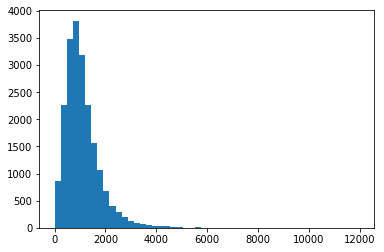

In [81]:
plt.hist(df_wall['trip_duration'],bins=50)

In [86]:
df_wall['trip_duration'].mean()

1085.6301436571707